In [1]:
#importacion de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Se hace el EDA a los dataframe ya limpios de nulos, los que se usaran en las funciones

## Carga de dataframe

In [35]:
df = pd.read_csv(r'dataframe\df.csv')
df1 = pd.read_csv(r'dataframe\df1.csv')


## Analisis de **df** y **df1**

En este dataframe df se encuentran todas las columnas, pero para el analisis estadisticoa en algunos casos es mejor usar df1, ya que al hacer el marge para generar el df, se terminan por repetir valores.

In [3]:
df.head(1)

,genres,developer,user_id,item_id_x,recommend,review,item_name,playtime_forever,release_year,posted_year,price,sentiment_analysis
0,['Action'],Tripwire Interactive,76561197970982479,1250,True,Simple yet with great replayability. In my opi...,Counter-Strike,6.0,2009,2011,19.99,Positive


Existen 12 columnas, solo a algunas se les puede aplicar metodos estadisticos a primera vista

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41421 entries, 0 to 41420
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   genres              41421 non-null  object 
 1   developer           41421 non-null  object 
 2   user_id             41421 non-null  object 
 3   item_id_x           41421 non-null  int64  
 4   recommend           41421 non-null  bool   
 5   review              41400 non-null  object 
 6   item_name           41421 non-null  object 
 7   playtime_forever    41421 non-null  float64
 8   release_year        41421 non-null  int64  
 9   posted_year         41421 non-null  int64  
 10  price               41421 non-null  float64
 11  sentiment_analysis  41421 non-null  object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 3.5+ MB


No existen valores nulos, los indices estan en orden

In [7]:
df.describe()

,item_id_x,playtime_forever,release_year,posted_year,price
count,41421.000000,41421.000000,41421.000000,41421.000000,41421.000000
mean,153313.951184,1380.337293,2011.685884,2014.153932,13.431562
std,125674.843943,7954.118987,3.290960,0.844166,14.385073
min,10.000000,0.000000,1989.000000,2010.000000,0.000000
25%,4000.000000,0.000000,2010.000000,2014.000000,0.000000
50%,207610.000000,45.000000,2012.000000,2014.000000,9.990000
75%,250110.000000,433.000000,2014.000000,2015.000000,19.990000
max,428880.000000,303466.000000,2017.000000,2015.000000,771.710000


- **Item_id_x :** No tiene sentido el analisis sobre esta columna, ya que solo es una etiqueta dada a los usuarios. <br>
- **playtime_forever :** Se podria hacer un analisis de esta columna. <br>
- **release_year :** Se podria hacer un analisis de esta columna en el **df1**. <br>
- **posted_year :** Se podria hacer un analisis de esta columna. <br>
- **price :** Se podria hacer un analisis de esta columna.

## Analisis de la columna **release_year** -> **Añio**


In [23]:
#el analisis se hace en el dataframe df1 porque la columna release_year se ve alterada al hacer marge
df1.describe()

,id,Añio,price
count,2.248700e+04,22487.000000,22487.000000
mean,4.309163e+05,2014.671988,8.959643
std,1.914330e+05,3.516056,15.407707
min,1.000000e+01,1983.000000,0.000000
25%,3.024650e+05,2014.000000,2.990000
50%,4.269970e+05,2016.000000,4.990000
75%,5.808325e+05,2017.000000,9.990000
max,2.028850e+06,2021.000000,995.000000


La mediana de los datos son el año 2014 y los datos van del 2010 a 2015

El valor de año 1983 (Dragon's Lair), parece ser un valor muy bajo. pero si se investiga por intenet se ve que esa fue su fecha de lanzamiento, es un juego antiguo.

In [24]:
df1[df1['Añio']==1983]

,title,id,developer,Añio,price
1258,Dragon's Lair,227380,Digital Leisure Inc.,1983,9.99


Cantidad de juegos publicados por añio

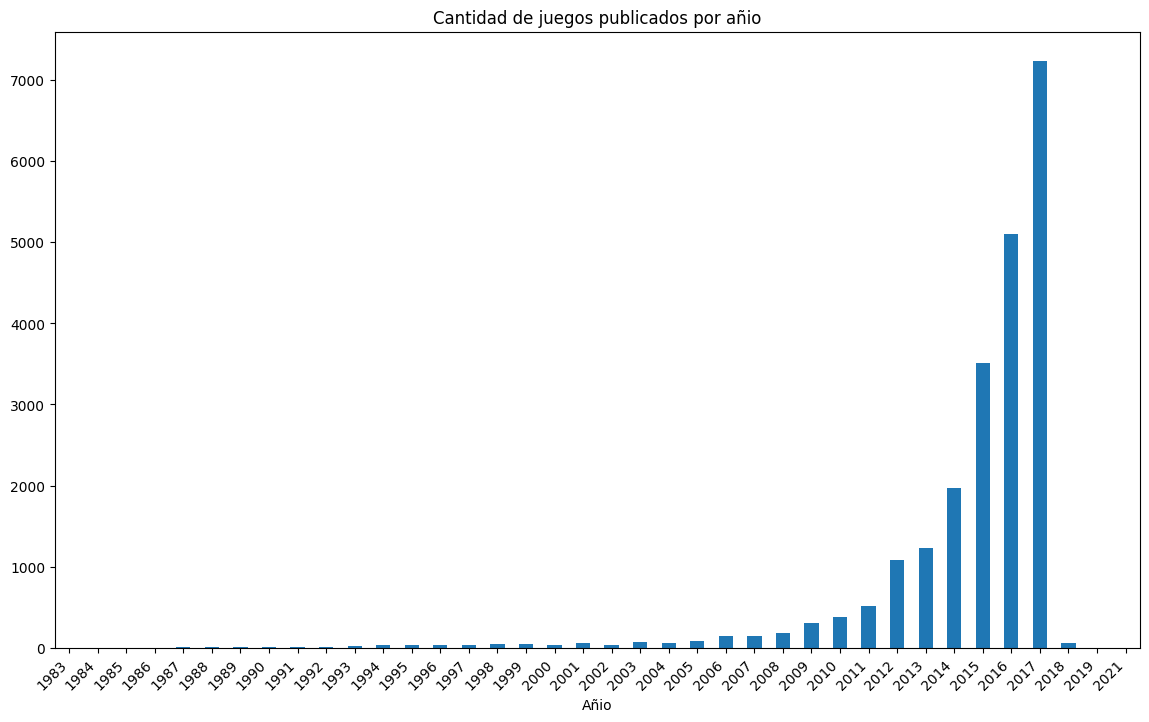

In [153]:
plt.figure(figsize=(14,8))
df_years = df1[['Añio','id']].drop_duplicates()
conteo_year = df_years['Añio'].value_counts().sort_index()
conteo_year.plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Cantidad de juegos publicados por añio')
plt.show()

Se Visualiza un gran aumento de juegos publicados a finales de la década del 2000 hasta finales de la década del 2010

## Analisis de columna **posted_year** 

La mediana de los datos son el año 2014 y los datos van del 1983 a 2021

## Revision de outliers (Regla de los 3 sigmas)

### Outliers de la columna **Playtime_forever** 

In [17]:
#regla de los 3 sigmas

sig_3 = 3*7954.12
#min = 1380.34-sig_3 # se obvia porque terminaria siendo tiempo negativo
max = 1380.34+sig_3

df_outliers_paytime_forever = df[ df['playtime_forever'] > max]
print('Existen',df_outliers_paytime_forever.shape[0],'outliers en la columna playtimeforever')

Existen 421 outliers en la columna playtimeforever


Existen 421 outliers, pero no seran borrado ya que la columna playtimeforever es el tiempo jugado durante todo el tiempo que se tienen registros.

### Outliers de la columna **price** 

In [16]:
#regla de los 3 sigmas

sig_3 = 3*14.38
#min = 13.43 - sig_3 # se obvia porque terminaria siendo dinero negativo
max = 13.43 + sig_3

df_outliers_price = df[df['price'] > max]

print('Existen',df_outliers_price.shape[0],'outliers en la columna price')

Existen 706 outliers en la columna price


In [20]:
print('Promedio de precios de los outliers', round(df_outliers_price['price'].mean(),2), 'USD')

Promedio de precios de los outliers 67.23 USD


El promedio de los ouliers es bajo. El juego con valor mas algo es de 771.71 USD, lo cual parece ser una cifra bastante alta, pero si se investiga un poco en internet se encuentra que el juego The Hidden and Unknown, se vendio por casi 2000 USD. por esos motivos se decidio dejar la columna price como esta.

## Analisis Columna **item-name** - **Juegos** 

In [92]:
print(f'Cantidad de juegos: {df1.id.unique().shape[0]}')

Cantidad de juegos: 22495


Top 10 de juegos mas jugados

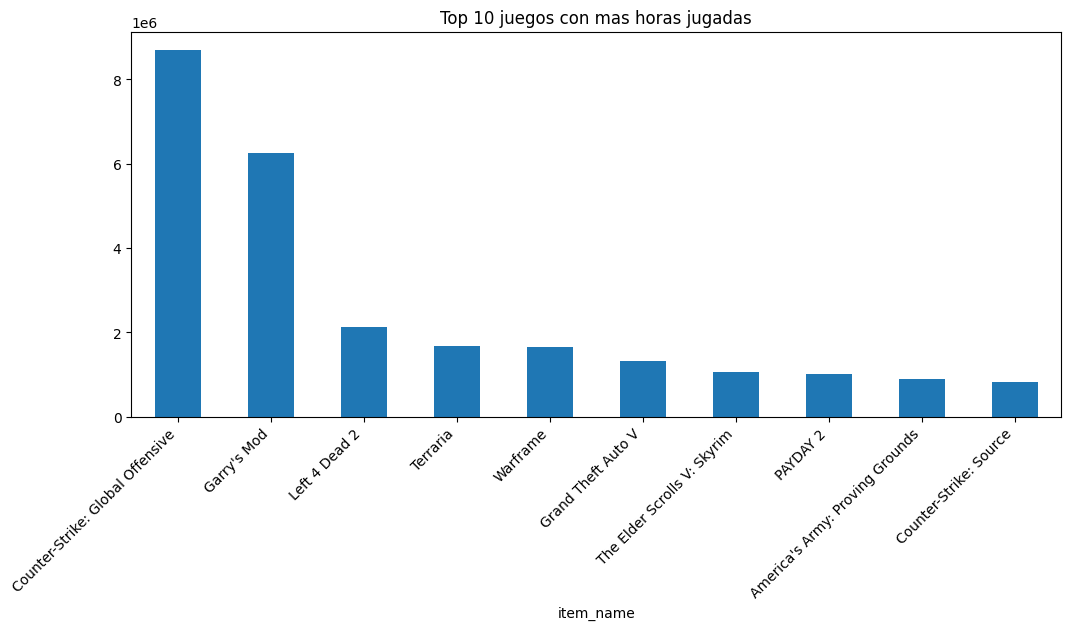

In [152]:
plt.figure(figsize=(12,5))
df.groupby('item_name')['playtime_forever'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 juegos con mas horas jugadas')
plt.show()

## Analisis columna **genres** - **generos**

Codigo para sacar los generos que estan dentro de las lista y los vuelve un dataframe

In [93]:
#Saca todos los generos dentro de las listas en la columna genres
#Crea un dataframe con los valores, para su facil manejo
lista=[]
for i in range(0,len(df1)):
    for impar in range(1, len(df1['genres'][i].split("'")), 2):
        lista.append(df1['genres'][i].split("'")[impar])

df_genres = pd.DataFrame(lista)
df_genres.rename({0:'genres'}, axis=1, inplace=True)

In [94]:
print(f'Cantidad de generos: {df_genres.genres.unique().shape[0]}')

Cantidad de generos: 21


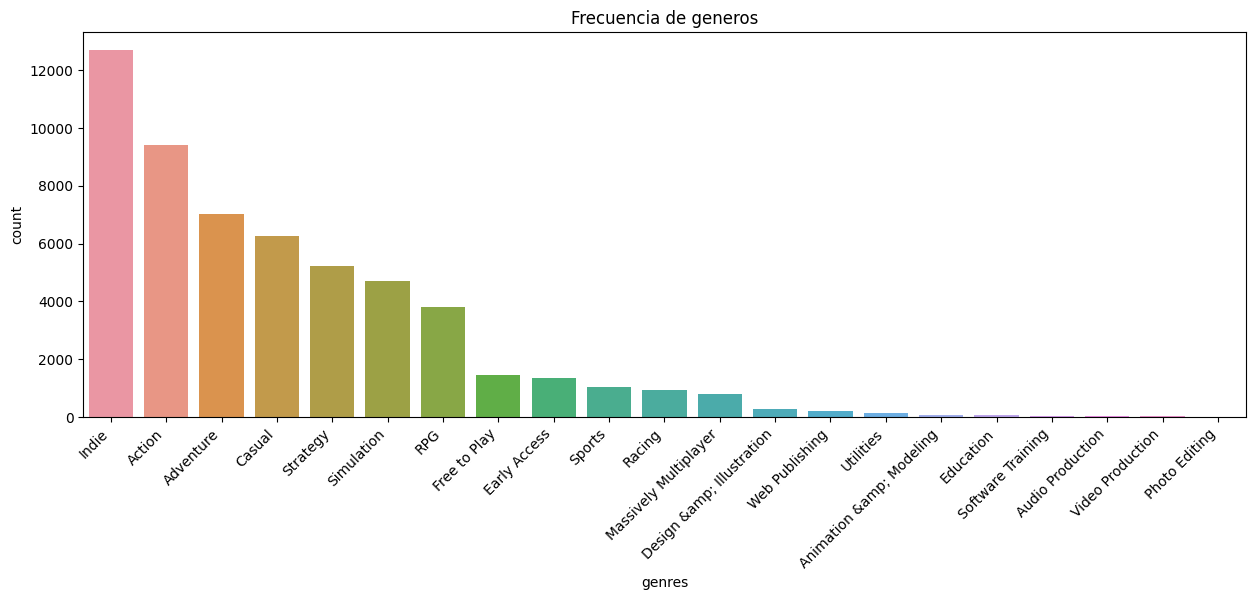

In [99]:
plt.figure(figsize=(15,5))
order = df_genres.genres.value_counts().index
sns.countplot(data=df_genres,x='genres',order=order)
plt.xticks(rotation=45,ha='right')
plt.title('Frecuencia de generos')
plt.show()

## Analisis de la columna **develonpers** - **desarrolladores**

In [95]:
print(f'Cantidad de desarrolladores: {df.developer.unique().shape[0]}')

Cantidad de desarrolladores: 1599


Top 10 de desarrolladores por cantidad de juegos

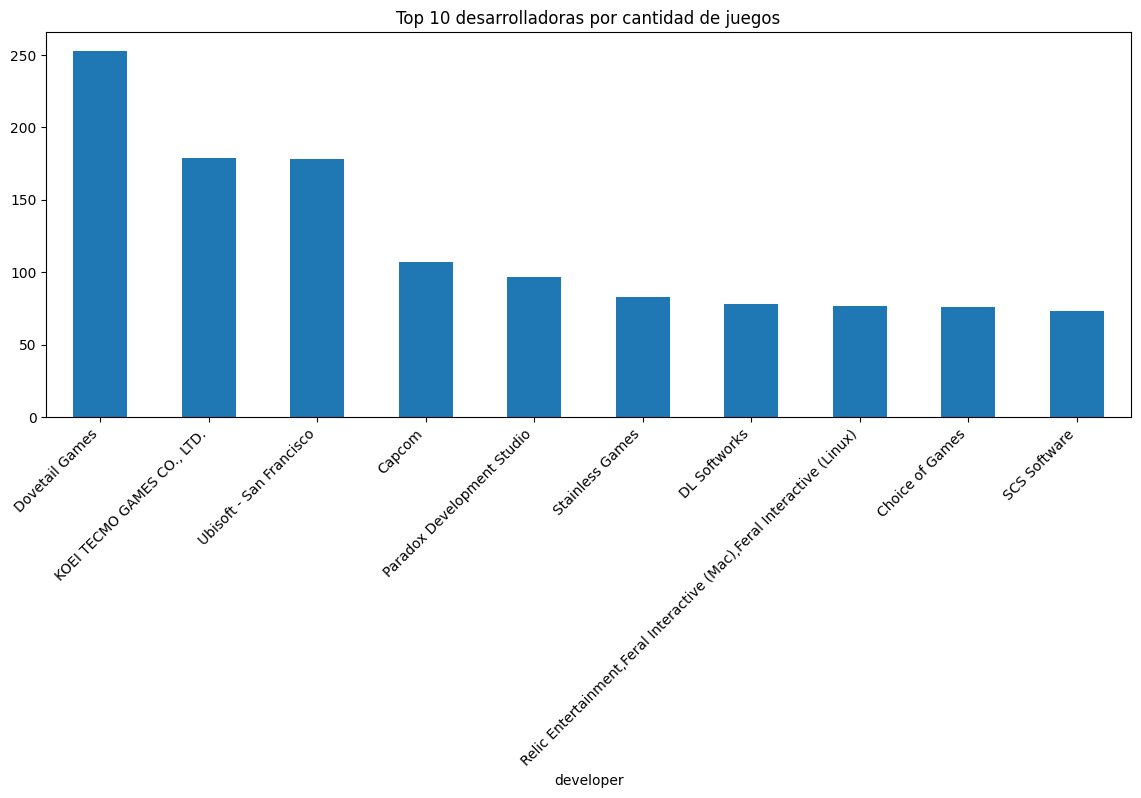

In [148]:
plt.figure(figsize=(14,5))
df_developers = df1[['developer','id']].drop_duplicates()
conteo_developer = df_developers['developer'].value_counts()
conteo_developer[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 desarrolladoras por cantidad de juegos')
plt.show()

Cantidad de juegos publicados por añio

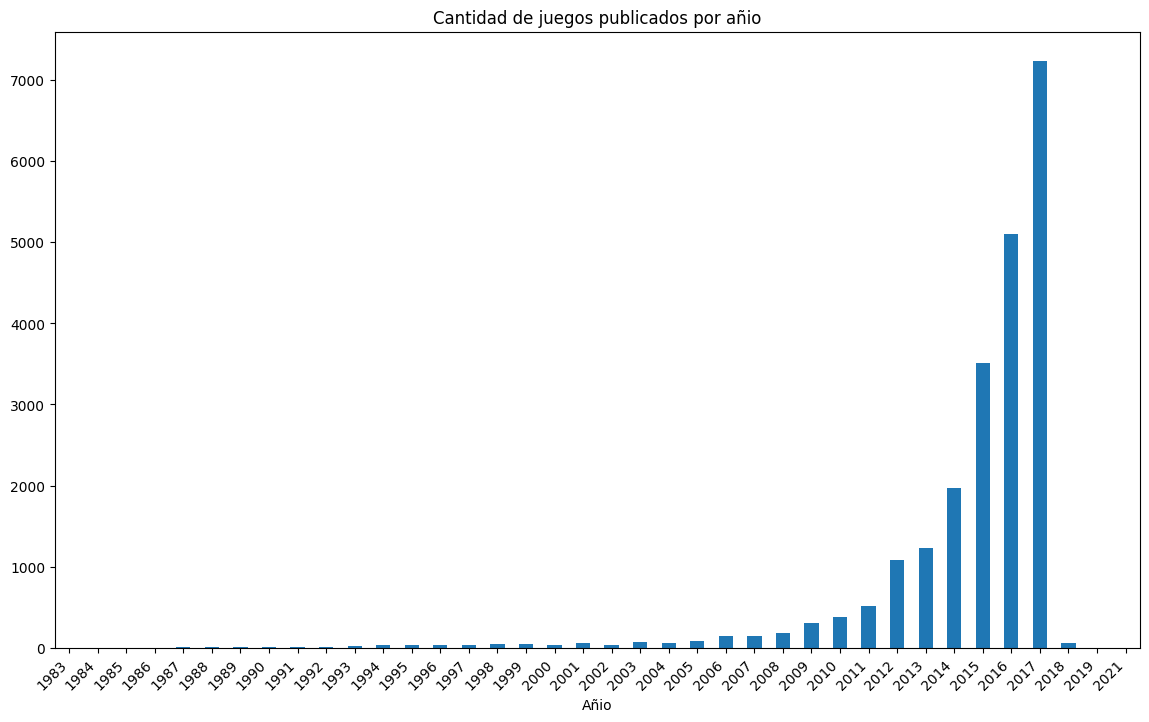

In [151]:
plt.figure(figsize=(14,8))
df_years = df1[['Añio','id']].drop_duplicates()
conteo_year = df_years['Añio'].value_counts().sort_index()
conteo_year.plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Cantidad de juegos publicados por añio')
plt.show()

## Analisis de la columna **user_id**

In [113]:
print(f'Cantidad de userios: {df.user_id.unique().shape[0]}')

Cantidad de userios: 20330


Los 10 usuarios con mas horas jugadas

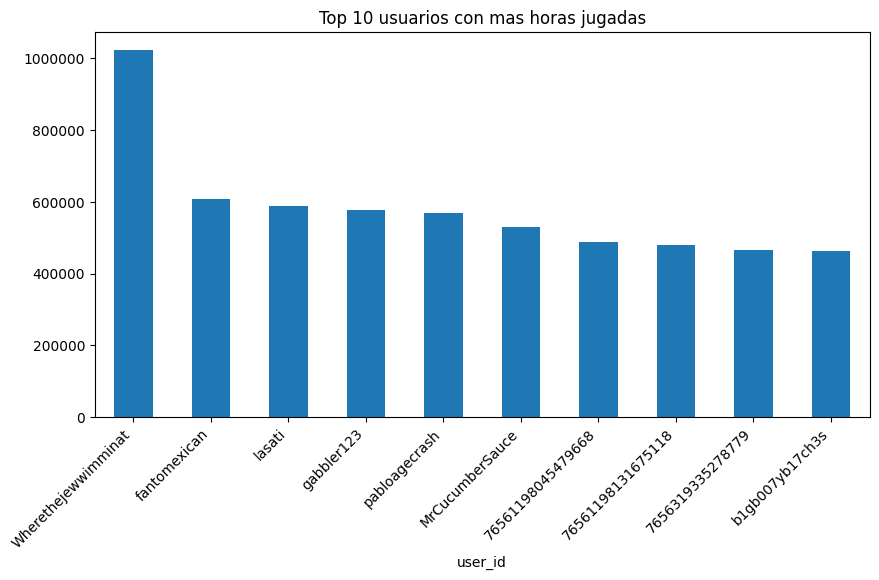

In [145]:
plt.figure(figsize=(10,5))
df.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)[:10].plot(kind='bar')
plt.xticks(rotation=45,ha='right')
plt.title('Top 10 usuarios con mas horas jugadas')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Analisis de la columna **recommend**

In [121]:
print(f'Numero de Recomendaciones True: {df.recommend[df.recommend == True].shape[0]}, un porcentaje sobre el total de {df.recommend[df.recommend == True].shape[0]/df.recommend.shape[0]*100:.2f}%')
print(f'Numero de Recomendaciones False: {df.recommend[df.recommend == False].shape[0]}, un porcentaje sobre el total de {df.recommend[df.recommend == False].shape[0]/df.recommend.shape[0]*100:.2f}%')


Numero de Recomendaciones True: 37717, un porcentaje sobre el total de 91.06%
Numero de Recomendaciones False: 3704, un porcentaje sobre el total de 8.94%


## Analisis de **sentiment_analysis**

In [136]:
#Se guardan en variables los valores para simbplificar las siguientes lineas de codigo
#Numero de Positive
pos=df[df['sentiment_analysis'] == 'Positive'].shape[0]
#Numero de Negative
neg=df[df['sentiment_analysis'] == 'Negative'].shape[0]
#Numero del total de datos en la columna sentimen_analysis
total=df['sentiment_analysis'].shape[0]

In [141]:
print(f'Analisis de semtimiento Positive:: {pos}, un porcentaje sobre el total de {pos/total*100:.2f}%')
print(f'Analisis de semtimiento Negative:: {neg}, un porcentaje sobre el total de {neg/total*100:.2f}%')

Analisis de semtimiento Positive:: 34889, un porcentaje sobre el total de 84.23%
Analisis de semtimiento Negative:: 6532, un porcentaje sobre el total de 15.77%
